In [17]:
import pandas as pd
import numpy as np

In [3]:
df_FE = pd.read_csv('processed_data_with_features.csv')

In [4]:
df_FE.head()

,timestamp,Hanwella_WaterLevel,Glencourse_WaterLevel,Glencourse_WaterLevel_Lagged_3h,Glencourse_WaterLevel_Lagged_24h,Glencourse_WaterLevel_Lagged_48h,Hanwella_StreamFlow,Glencourse_StreamFlow,Glencourse_StreamFlow_Lagged_3h,Hanwella_Rainfall,...,weighted_rainfall_index,weighted_rainfall_cum_6h,weighted_rainfall_cum_12h,weighted_rainfall_cum_24h,weighted_rainfall_cum_48h,rainfall_intensity_change_6h,rainfall_intensity_change_12h,high_rainfall_alert,high_water_alert,rainfall_waterlevel_interaction
0,10/4/2013 0:00,-0.368015,-0.209578,-0.173797,-0.114188,-0.018609,-0.519395,-0.379926,-0.363098,-0.145849,...,-0.197345,0.618547,0.409033,-0.025205,-0.31742,0.864024,-0.000074,-0.229392,False,-0.175555
1,10/4/2013 1:00,-0.368759,-0.215012,-0.184666,-0.123514,0.003174,-0.519669,-0.382616,-0.368069,2.268423,...,-0.178300,0.618547,0.409033,-0.025205,-0.31742,0.864024,-0.000074,-0.229392,False,-0.165753
2,10/4/2013 2:00,-0.371735,-0.219670,-0.198641,-0.140611,0.028847,-0.520354,-0.384688,-0.374896,3.475559,...,1.796497,0.618547,0.409033,-0.025205,-0.31742,0.864024,-0.000074,-0.229392,False,0.848056
3,10/4/2013 3:00,-0.375454,-0.221222,-0.209510,-0.149936,0.040516,-0.521246,-0.385515,-0.379868,4.883885,...,-0.197345,0.618547,0.409033,-0.025205,-0.31742,0.864024,-0.000074,-0.229392,False,-0.175555
4,10/4/2013 4:00,-0.382150,-0.221222,-0.214945,-0.149936,0.026513,-0.522891,-0.385515,-0.382558,3.395083,...,0.986587,0.618547,0.409033,-0.025205,-0.31742,0.864024,-0.000074,-0.229392,False,0.426958


In [9]:
# Check dataset info
print("Dataset Info:")
print(df_FE.info())

# Check missing values
missing_values = df_FE.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Check data types and memory usage
print("\nMemory Usage:")
print(df_FE.memory_usage(deep=True))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87577 entries, 0 to 87576
Columns: 102 entries, timestamp to rainfall_waterlevel_interaction
dtypes: bool(1), float64(80), object(21)
memory usage: 67.6+ MB
None

Missing Values (%):
Series([], dtype: float64)

First few rows of the dataset:
        timestamp  Hanwella_WaterLevel  Glencourse_WaterLevel  \
0  10/4/2013 0:00            -0.368015              -0.209578   
1  10/4/2013 1:00            -0.368759              -0.215012   
2  10/4/2013 2:00            -0.371735              -0.219670   
3  10/4/2013 3:00            -0.375454              -0.221222   
4  10/4/2013 4:00            -0.382150              -0.221222   

   Glencourse_WaterLevel_Lagged_3h  Glencourse_WaterLevel_Lagged_24h  \
0                        -0.173797                         -0.114188   
1                        -0.184666                         -0.123514   
2                        -0.198641                         -0.140611   
3              

Statistical Summary:
       Hanwella_WaterLevel  Glencourse_WaterLevel  \
count         8.757700e+04           8.757700e+04   
mean         -1.711029e-12           8.889024e-13   
std           1.000006e+00           1.000006e+00   
min          -1.149159e+00          -1.488917e+00   
25%          -7.176697e-01          -7.064087e-01   
50%          -3.159386e-01          -2.251039e-01   
75%           3.833709e-01           4.293154e-01   
max           6.312623e+00           7.977262e+00   

       Glencourse_WaterLevel_Lagged_3h  Glencourse_WaterLevel_Lagged_24h  \
count                     8.757700e+04                      8.757700e+04   
mean                      1.254890e-12                      1.137372e-12   
std                       1.000006e+00                      1.000006e+00   
min                      -1.488974e+00                     -1.489724e+00   
25%                      -7.063892e-01                     -7.063677e-01   
50%                      -2.250376e-01       

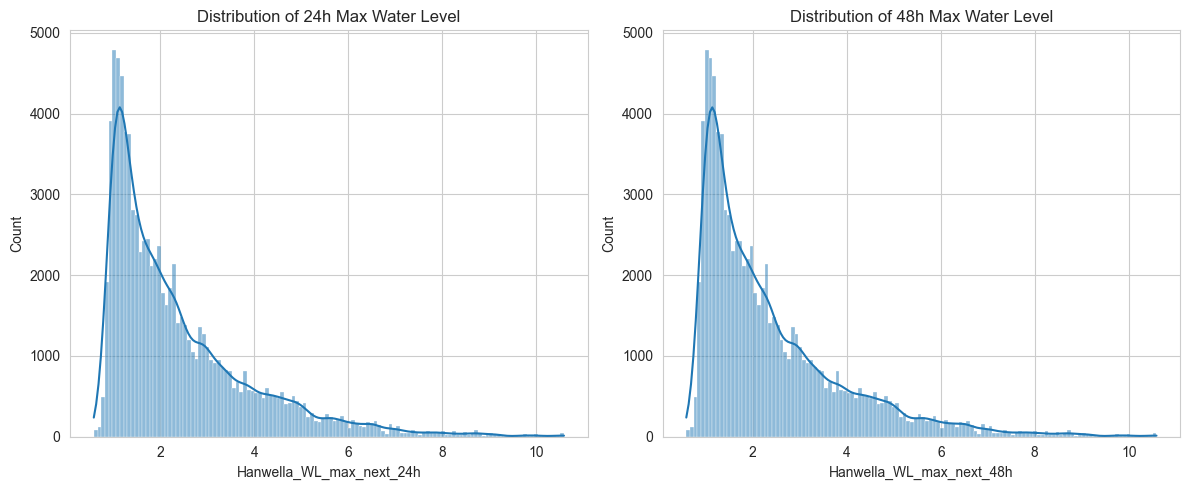

In [12]:
# Basic statistics of numerical columns
print("Statistical Summary:")
print(df_FE.describe())

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variables
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_FE['Hanwella_WL_max_next_24h'], kde=True)
plt.title('Distribution of 24h Max Water Level')

plt.subplot(1, 2, 2)
sns.histplot(df_FE['Hanwella_WL_max_next_48h'], kde=True)
plt.title('Distribution of 48h Max Water Level')

plt.tight_layout()
plt.show()


In [13]:
# First convert datetime columns to proper datetime objects
# Identify datetime columns (assuming the format is consistent)
datetime_cols = df_FE.select_dtypes(include=['object']).columns[
    df_FE.select_dtypes(include=['object']).apply(
        lambda x: pd.to_datetime(x, errors='coerce').notnull().all()
    )
]

# Convert datetime columns to datetime type
for col in datetime_cols:
    df_FE[col] = pd.to_datetime(df_FE[col])

# Get only numeric columns for correlation
numeric_df = df_FE.select_dtypes(include=['int64', 'float64'])

# Create correlation matrix
correlation_matrix = numeric_df.corr()

# Get top 15 correlations for each target
target_cols = ['Hanwella_WL_max_next_24h', 'Hanwella_WL_max_next_48h']
top_corr_dict = {}
for target in target_cols:
    if target in correlation_matrix.columns:
        top_corr_dict[target] = correlation_matrix[target].sort_values(ascending=False)[:15]

# Display results
for target, correlations in top_corr_dict.items():
    print(f"\nTop 15 correlations for {target}:")
    print(correlations)


C:\Users\Danula Perera\AppData\Local\Temp\ipykernel_4756\1228602515.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lambda x: pd.to_datetime(x, errors='coerce').notnull().all()
C:\Users\Danula Perera\AppData\Local\Temp\ipykernel_4756\1228602515.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lambda x: pd.to_datetime(x, errors='coerce').notnull().all()
C:\Users\Danula Perera\AppData\Local\Temp\ipykernel_4756\1228602515.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lambda x: pd.to_datetime(x, errors='coerce').notnull().all()
C:\Users\Danula Perera\AppData\Local\


Top 15 correlations for Hanwella_WL_max_next_24h:
Hanwella_WL_max_next_24h            1.000000
Hanwella_WaterLevel                 0.916947
Glencourse_WaterLevel               0.910476
Glencourse_WaterLevel_Lagged_3h     0.898757
Hanwella_WL_max_next_48h            0.885380
Hanwella_WL_24h_max                 0.885176
Hanwella_WL_24h_mean                0.863484
Hanwella_StreamFlow                 0.858621
Glencourse_StreamFlow               0.850418
Glencourse_StreamFlow_Lagged_3h     0.839658
Hanwella_WL_24h_min                 0.827556
Glencourse_WaterLevel_Lagged_24h    0.777591
weighted_rainfall_cum_48h           0.744601
Kithulgala_cumRF_48h                0.718865
Glencourse_WaterLevel_Lagged_48h    0.690298
Name: Hanwella_WL_max_next_24h, dtype: float64

Top 15 correlations for Hanwella_WL_max_next_48h:
Hanwella_WL_max_next_48h            1.000000
Hanwella_WL_max_next_24h            0.885380
Glencourse_WaterLevel               0.777999
Hanwella_WaterLevel                 0.777

In [18]:
print("Categorical columns:", df_FE.select_dtypes(include=['object']).columns.tolist())
print("Numeric columns:", df_FE.select_dtypes(include=[np.number]).columns.tolist())


Categorical columns: ['Hanwella_cumRF_6h_Intensity', 'Glencourse_cumRF_6h_Intensity', 'Holombuwa_cumRF_6h_Intensity', 'Kithulgala_cumRF_6h_Intensity', 'Deraniyagala_cumRF_6h_Intensity', 'Hanwella_cumRF_12h_Intensity', 'Glencourse_cumRF_12h_Intensity', 'Holombuwa_cumRF_12h_Intensity', 'Kithulgala_cumRF_12h_Intensity', 'Deraniyagala_cumRF_12h_Intensity', 'Hanwella_cumRF_24h_Intensity', 'Glencourse_cumRF_24h_Intensity', 'Holombuwa_cumRF_24h_Intensity', 'Kithulgala_cumRF_24h_Intensity', 'Deraniyagala_cumRF_24h_Intensity', 'Hanwella_cumRF_48h_Intensity', 'Glencourse_cumRF_48h_Intensity', 'Holombuwa_cumRF_48h_Intensity', 'Kithulgala_cumRF_48h_Intensity', 'Deraniyagala_cumRF_48h_Intensity']
Numeric columns: ['Hanwella_WaterLevel', 'Glencourse_WaterLevel', 'Glencourse_WaterLevel_Lagged_3h', 'Glencourse_WaterLevel_Lagged_24h', 'Glencourse_WaterLevel_Lagged_48h', 'Hanwella_StreamFlow', 'Glencourse_StreamFlow', 'Glencourse_StreamFlow_Lagged_3h', 'Hanwella_Rainfall', 'Glencourse_Rainfall', 'Holomb

In [19]:
import numpy as np
import pandas as pd


def identify_collinear_features(df, threshold=0.95):
    # Get list of intensity columns to exclude
    intensity_columns = [col for col in df.columns if 'Intensity' in col]

    # Create DataFrame without intensity columns
    numeric_df = df.drop(columns=intensity_columns)

    # Calculate correlation matrix
    corr_matrix = numeric_df.corr().abs()

    # Get upper triangle of correlations
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    collinear_features = []

    # Find features with correlation greater than threshold
    for column in upper.columns:
        # Find correlated features for each column
        high_corr = upper[column][upper[column] > threshold].index.tolist()
        if high_corr:
            collinear_features.append((column, high_corr))

    return collinear_features


# Usage:
try:
    collinear_groups = identify_collinear_features(df_FE)
    print("\nHighly correlated feature groups (correlation > 0.95):")
    for feature, corr_features in collinear_groups:
        print(f"Feature '{feature}' is highly correlated with: {corr_features}")

    # Optional: Print summary statistics
    print(f"\nTotal number of feature groups with high correlation: {len(collinear_groups)}")

except Exception as e:
    print(f"An error occurred: {str(e)}")



Highly correlated feature groups (correlation > 0.95):
Feature 'Glencourse_WaterLevel' is highly correlated with: ['Hanwella_WaterLevel']
Feature 'Glencourse_WaterLevel_Lagged_3h' is highly correlated with: ['Hanwella_WaterLevel', 'Glencourse_WaterLevel']
Feature 'Hanwella_StreamFlow' is highly correlated with: ['Hanwella_WaterLevel']
Feature 'Glencourse_StreamFlow_Lagged_3h' is highly correlated with: ['Hanwella_StreamFlow', 'Glencourse_StreamFlow']
Feature 'Hanwella_WL_24h_max' is highly correlated with: ['Hanwella_WaterLevel']
Feature 'Hanwella_WL_24h_mean' is highly correlated with: ['Hanwella_WaterLevel', 'Hanwella_WL_24h_max', 'Hanwella_WL_24h_min']
Feature 'weighted_rainfall_index' is highly correlated with: ['Glencourse_Rainfall']
Feature 'weighted_rainfall_cum_6h' is highly correlated with: ['Glencourse_cumRF_6h']
Feature 'weighted_rainfall_cum_12h' is highly correlated with: ['Glencourse_cumRF_12h']
Feature 'weighted_rainfall_cum_24h' is highly correlated with: ['Glencourse_

In [20]:
# Calculate variance for numerical features
variance = df_FE.select_dtypes(include=['float64', 'int64']).var()
low_variance = variance[variance < 0.01].sort_values()

print("\nFeatures with very low variance (< 0.01):")
print(low_variance)



Features with very low variance (< 0.01):
Series([], dtype: float64)


In [22]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound


# First get the correlation matrix from your existing data
try:
    # Calculate correlation matrix excluding intensity columns
    intensity_columns = [col for col in df_FE.columns if 'Intensity' in col]
    numeric_df = df_FE.drop(columns=intensity_columns)
    correlation_matrix = numeric_df.corr().abs()

    # Get top 10 correlated features (excluding self-correlations)
    # We'll take the mean correlation for each feature to rank them
    mean_correlations = correlation_matrix.mean().sort_values(ascending=False)
    important_features = list(mean_correlations.index[:10])

    print("\nOutlier Analysis:")
    for feature in important_features:
        outlier_count, lb, ub = detect_outliers(numeric_df, feature)
        print(f"{feature}:")
        print(f"- Number of outliers: {outlier_count}")
        print(f"- Bounds: [{lb:.2f}, {ub:.2f}]")
        print()

except Exception as e:
    print(f"An error occurred: {str(e)}")



Outlier Analysis:
weighted_rainfall_cum_48h:
- Number of outliers: 4814
- Bounds: [-2.25, 1.89]

Hanwella_WL_max_next_24h:
- Number of outliers: 4011
- Bounds: [-1.42, 5.68]

Glencourse_WaterLevel:
- Number of outliers: 3232
- Bounds: [-2.41, 2.13]

Hanwella_WaterLevel:
- Number of outliers: 4247
- Bounds: [-2.37, 2.03]

Glencourse_StreamFlow:
- Number of outliers: 6170
- Bounds: [-1.69, 1.33]

Glencourse_WaterLevel_Lagged_3h:
- Number of outliers: 3229
- Bounds: [-2.41, 2.13]

Hanwella_StreamFlow:
- Number of outliers: 7682
- Bounds: [-1.53, 1.10]

Glencourse_cumRF_48h:
- Number of outliers: 6756
- Bounds: [-1.97, 1.56]

Glencourse_StreamFlow_Lagged_3h:
- Number of outliers: 6170
- Bounds: [-1.69, 1.33]

Hanwella_WL_24h_max:
- Number of outliers: 3988
- Bounds: [-2.47, 2.14]



In [23]:
# Features to keep based on correlation analysis and multicollinearity
primary_features = [
    'Hanwella_WaterLevel',  # Strong predictor, primary measurement
    'Hanwella_StreamFlow',  # Important flow indicator
    'Hanwella_WL_24h_mean',  # Representative of water level statistics
    'weighted_rainfall_cum_48h',  # Important rainfall indicator
    'weighted_rainfall_cum_24h',  # Additional rainfall timeframe
]

# Remove highly correlated features
features_to_remove = [
    'Glencourse_WaterLevel',
    'Glencourse_WaterLevel_Lagged_3h',
    'Glencourse_StreamFlow',
    'Glencourse_StreamFlow_Lagged_3h',
    'Hanwella_WL_24h_max',
    'Hanwella_WL_24h_min',
    'Glencourse_cumRF_48h',
    'Glencourse_cumRF_24h',
    'Glencourse_cumRF_12h',
    'Glencourse_cumRF_6h'
]


In [24]:
def create_engineered_features(df):
    # Create rate of change features
    df['WL_change_rate'] = df['Hanwella_WaterLevel'].diff()

    # Create interaction features
    df['rainfall_waterlevel_interaction'] = df['Hanwella_WaterLevel'] * df['weighted_rainfall_cum_48h']

    # Create rolling means (if timestamp is available)
    df['WL_rolling_mean_6h'] = df['Hanwella_WaterLevel'].rolling(window=6).mean()

    return df


In [29]:
df.head()

NameError: name 'df' is not defined

In [25]:
from sklearn.preprocessing import RobustScaler
import numpy as np


def preprocess_features(df):
    # Create copy to avoid modifying original data
    df_processed = df.copy()

    # List of features that need log transformation (stream flow features)
    log_transform_features = ['Hanwella_StreamFlow']

    # List of features that need sqrt transformation (rainfall features)
    sqrt_transform_features = ['weighted_rainfall_cum_48h', 'weighted_rainfall_cum_24h']

    # Apply transformations
    for feature in log_transform_features:
        # Add small constant to handle zeros
        df_processed[feature] = np.log1p(df_processed[feature])

    for feature in sqrt_transform_features:
        df_processed[feature] = np.sqrt(df_processed[feature])

    # Apply robust scaling
    scaler = RobustScaler()
    numeric_columns = df_processed.select_dtypes(include=['float64']).columns
    df_processed[numeric_columns] = scaler.fit_transform(df_processed[numeric_columns])

    return df_processed, scaler


In [26]:
def prepare_data_for_modeling(df):
    # 1. Select features
    df_selected = df[primary_features].copy()

    # 2. Engineer new features
    df_engineered = create_engineered_features(df_selected)

    # 3. Handle outliers and scale
    df_processed, scaler = preprocess_features(df_engineered)

    # 4. Split features and target
    X = df_processed.drop(['target_column'], axis=1)
    y = df_processed['target_column']

    return X, y, scaler

# Usage example:
# X, y, scaler = prepare_data_for_modeling(your_dataframe)


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


# First, let's implement our full pipeline
def prepare_data_for_modeling(df, target_column='Hanwella_WL_max_next_24h'):
    # 1. Select primary features
    primary_features = [
        'Hanwella_WaterLevel',
        'Hanwella_StreamFlow',
        'Hanwella_WL_24h_mean',
        'weighted_rainfall_cum_48h',
        'weighted_rainfall_cum_24h',
        target_column
    ]

    df_selected = df[primary_features].copy()

    # 2. Feature Engineering
    df_selected['WL_change_rate'] = df_selected['Hanwella_WaterLevel'].diff()
    df_selected['rainfall_waterlevel_interaction'] = (
            df_selected['Hanwella_WaterLevel'] * df_selected['weighted_rainfall_cum_48h']
    )

    # 3. Handle missing values from diff operation
    df_selected = df_selected.fillna(method='bfill')

    # 4. Transform features
    df_selected['Hanwella_StreamFlow'] = np.log1p(df_selected['Hanwella_StreamFlow'])
    df_selected['weighted_rainfall_cum_48h'] = np.sqrt(df_selected['weighted_rainfall_cum_48h'])
    df_selected['weighted_rainfall_cum_24h'] = np.sqrt(df_selected['weighted_rainfall_cum_24h'])

    # 5. Scale features
    scaler = RobustScaler()
    features = [col for col in df_selected.columns if col != target_column]
    df_selected[features] = scaler.fit_transform(df_selected[features])

    return df_selected, scaler


# Model Implementation
def train_and_evaluate_models(df, target_column='Hanwella_WL_max_next_24h'):
    # 1. Prepare data
    processed_df, scaler = prepare_data_for_modeling(df, target_column)

    # 2. Split features and target
    X = processed_df.drop([target_column], axis=1)
    y = processed_df[target_column]

    # 3. Train-test split (using time series split since this is time series data)
    tscv = TimeSeriesSplit(n_splits=5)

    # 4. Initialize models
    models = {
        'XGBoost': XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=6,
            random_state=42
        ),
        'RandomForest': RandomForestRegressor(
            n_estimators=100,
            max_depth=10,
            random_state=42
        )
    }

    # 5. Train and evaluate models
    results = {}
    for name, model in models.items():
        # Cross-validation scores
        cv_scores = cross_val_score(
            model,
            X,
            y,
            cv=tscv,
            scoring='neg_mean_squared_error'
        )
        rmse_scores = np.sqrt(-cv_scores)

        # Train final model
        model.fit(X, y)

        # Store results
        results[name] = {
            'model': model,
            'cv_rmse_mean': rmse_scores.mean(),
            'cv_rmse_std': rmse_scores.std(),
            'feature_importance': pd.Series(
                model.feature_importances_,
                index=X.columns
            ).sort_values(ascending=False)
        }

    return results, X, y


# Visualization functions
def plot_feature_importance(results, model_name):
    plt.figure(figsize=(10, 6))
    results[model_name]['feature_importance'].plot(kind='bar')
    plt.title(f'Feature Importance - {model_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_predictions(model, X, y, title):
    y_pred = model.predict(X)

    plt.figure(figsize=(12, 6))
    plt.scatter(y, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.tight_layout()
    plt.show()


# Usage example:
def main(df):
    # Train models and get results
    results, X, y = train_and_evaluate_models(df)

    # Print results
    for name, result in results.items():
        print(f"\n{name} Results:")
        print(f"Average RMSE: {result['cv_rmse_mean']:.4f} (±{result['cv_rmse_std']:.4f})")
        print("\nTop 5 Important Features:")
        print(result['feature_importance'].head())

        # Plot feature importance
        plot_feature_importance(results, name)

        # Plot predictions
        plot_predictions(
            result['model'],
            X,
            y,
            f'{name} - Actual vs Predicted'
        )

    return results

# To use the code:
# results = main(your_dataframe)


In [ ]:
# Load your data
df = pd.read_csv('your_data.csv')  # or however you load your data

# Run the full pipeline
results = main(df)

# Access specific model
xgb_model = results['XGBoost']['model']
rf_model = results['RandomForest']['model']

# Make predictions with specific model
predictions = xgb_model.predict(new_data)
